<a href="https://colab.research.google.com/github/the-it-weirdo/ANN_vs_CNN_for_Image_Classification/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST

## Preparing workspace and downloading data

### Preparing workspace

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
# to check the current working directory
%pwd 

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

### Data Download

In [4]:
 %pip install -q kaggle

In [5]:
# fetching data from Kaggle using Kaggle API
!kaggle datasets download -d zalando-research/fashionmnist

 95% 65.0M/68.8M [00:01<00:00, 32.6MB/s]
100% 68.8M/68.8M [00:01<00:00, 43.2MB/s]


In [6]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  fashionmnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
!ls

fashion-mnist_test.csv	 model.png		 train-images-idx3-ubyte
fashion-mnist_train.csv  t10k-images-idx3-ubyte  train-labels-idx1-ubyte
kaggle.json		 t10k-labels-idx1-ubyte


## Loading data and pre-processing

### Importing required libraries

In [8]:
import pandas as pd
import numpy as np

### Loading data

In [9]:
filepath = '/content/gdrive/My Drive/Kaggle/fashion-mnist_train.csv'
main_df = pd.read_csv(filepath)

In [10]:
main_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [11]:
main_df.describe(include='all')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

**Label with name**

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

In [12]:
# This label names indicate the 9 classes of the dataset. They are properly mapped with the 
# index of the list being the label coulmn value in the dataset
LABEL_NAMES = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### Missing value ?



In [13]:
main_df.isnull().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

#### Using Seaborn Heatmap to visualise null value if any

In [14]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


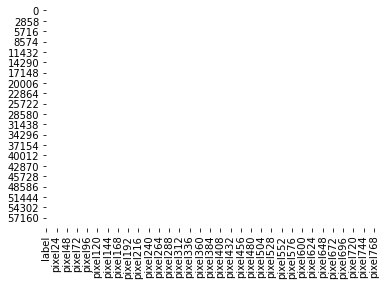

In [15]:
sns.heatmap(main_df.isnull(), cbar=False)

#### Using missingno library to visualise null value if any

In [16]:
import missingno as msno

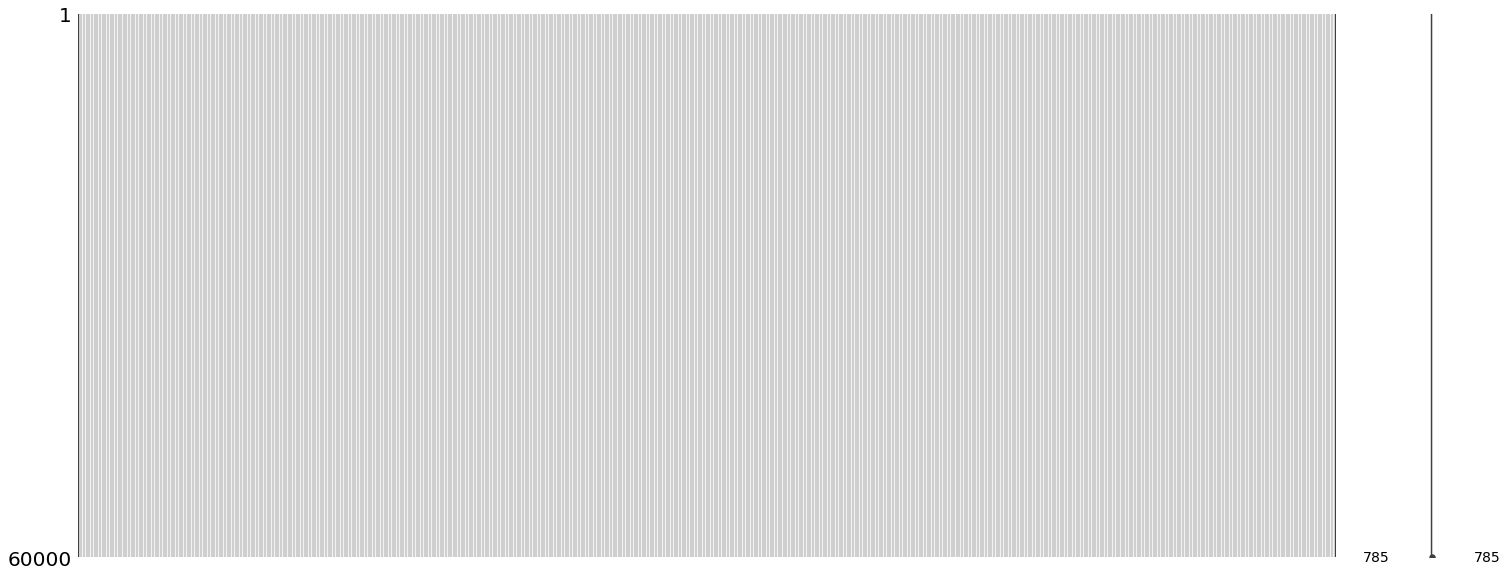

In [17]:
msno.matrix(main_df)

In [18]:
#msno.heatmap(main_df)

### Splitting data into X and y. 
X is the input. y is the output

In [19]:
X_train = main_df.drop('label',axis = 1)
y_train = main_df['label']

### Visualising data

In [20]:
import matplotlib.pyplot as plt

In [21]:
# for visualisation purpose, we need to change the data into proper shape
x_train_reshape = X_train.values.reshape(-1,28,28)

In [22]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

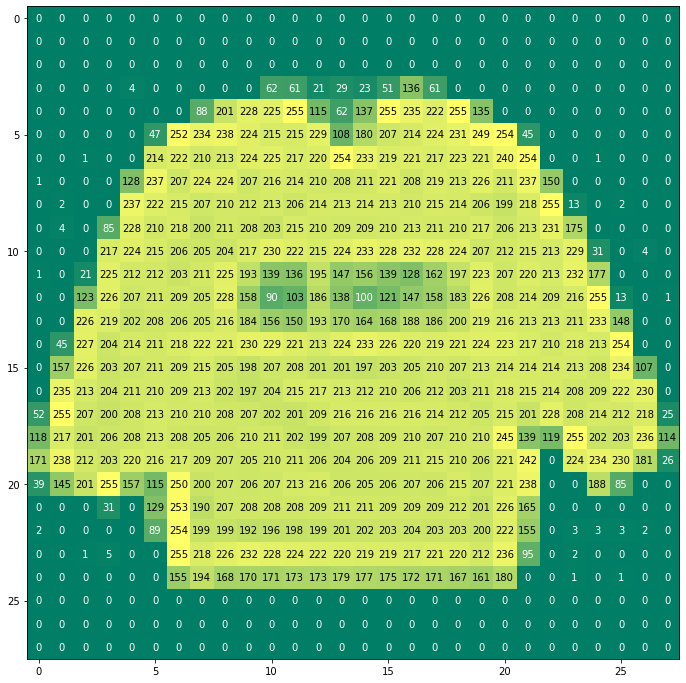

In [23]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[0], ax)
plt.show()

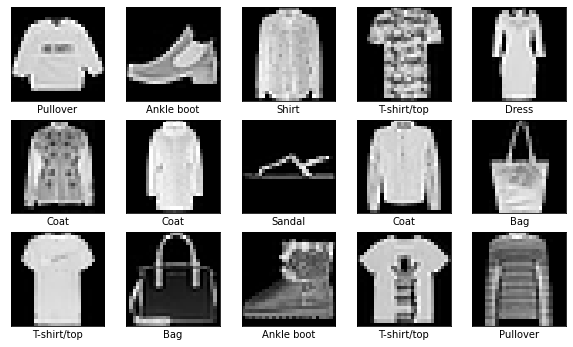

In [24]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(LABEL_NAMES[y_train[i]])
plt.show()

### Preprocessing

#### Normalization

In out dataset pixel values for each image in the dataset are unsigned integers in the range between 0 and 255. In order to scale the each value in the dataset we devide the dataset by 255.After scaling, dataset has valuesin the range of 0 to 1.

In [25]:
X_train=X_train/255

## Models and Training

### Import required

In [26]:
import tensorflow as tf

### Model building

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
model.add(tf.keras.layers.Dense(units=24, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250       
Total params: 103,826
Trainable params: 103,826
Non-trainable params: 0
_________________________________________________________________


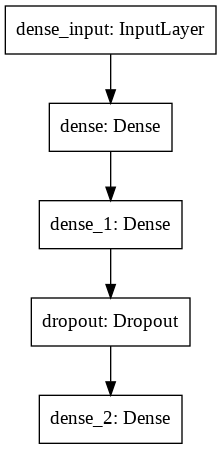

In [28]:
tf.keras.utils.plot_model(model)

In [29]:
model_history = model.fit(X_train,y_train,epochs = 40)
model_history.params

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5985 - sparse_categorical_accuracy: 0.7884
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4369 - sparse_categorical_accuracy: 0.8446
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3926 - sparse_categorical_accuracy: 0.8588
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3668 - sparse_categorical_accuracy: 0.8688
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3441 - sparse_categorical_accuracy: 0.8763
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3299 - sparse_categorical_accuracy: 0.8807
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3195 - sparse_categorical_accuracy: 0.8848
Epoch 8/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - sparse_categorical_accuracy: 0.8887
Epoch 9/40
1875/1875 [==========

{'epochs': 40, 'steps': 1875, 'verbose': 1}

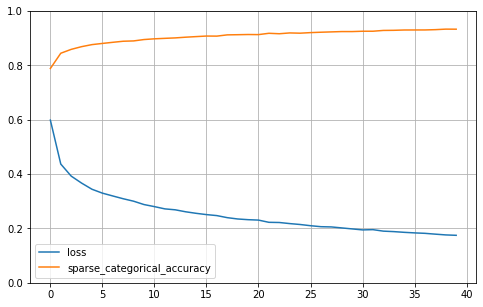

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
## Remaining:
# 1. Loading the test data and performing same preprocessing as train data
# 2. evaluating the trained model.
# 3. building cnn and evaluating cnn model
# 4. think next ?


## Loading Test Data

In [32]:
filepath = '/content/gdrive/My Drive/Kaggle/fashion-mnist_test.csv'
test_df = pd.read_csv(filepath)

In [33]:
test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [34]:
test_df.describe(include='all')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,14.363500,33.625600,46.371400,52.705500,50.959500,50.722900,53.773300,51.668100,40.957300,26.241800,10.37650,4.142300,2.021100,1.125100,0.771200,0.452800,0.245900,0.067500,0.033900,0.008300,0.032400,0.125500,0.302700,0.720100,1.977300,7.117700,17.217500,31.759600,53.424700,81.266500,...,93.047300,90.600000,78.859100,61.960100,45.922200,44.413500,47.56900,38.041800,21.628900,8.533300,3.227400,0.46090,0.031600,0.215,0.888200,4.366100,12.836900,20.695900,20.847100,16.933400,22.210700,30.836100,42.304200,52.398200,52.929500,46.106400,42.722100,45.515100,50.258400,46.109200,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,37.911701,58.728202,66.622009,69.652762,68.646661,67.973606,69.853856,68.372231,63.562213,51.962122,32.75711,20.554695,14.091122,10.783361,9.136432,7.110811,5.773246,2.496271,1.938898,0.388904,1.288144,4.151876,5.003037,9.590733,15.750632,29.975719,47.858968,65.367595,82.516117,96.591129,...,101.315512,100.237952,95.316054,88.969202,78.893333,77.560636,83.26921,73.827424,54.836583,36.256582,22.229015,6.85644,1.303139,4.557,9.090213,20.445965,37.378604,48.704573,47.924505,42.155582,48.651452,55.721562,63.108566,69.561834,70.317282,67.675636,66.805592,67.386268,69.018887,66.423861,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.00

### Splitting data into X and y. 
X is the input. y is the output

In [35]:
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [36]:
x_test = X_test / 255

## Evaluation of ANN Model

In [37]:
ann_test_loss, ann_test_accuracy = model.evaluate(x_test, y_test)
print("\n Accuracy of ANN model:",ann_test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8929

 Accuracy of ANN model: 0.8928999900817871


In [38]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)

In [39]:
from sklearn.metrics import confusion_matrix

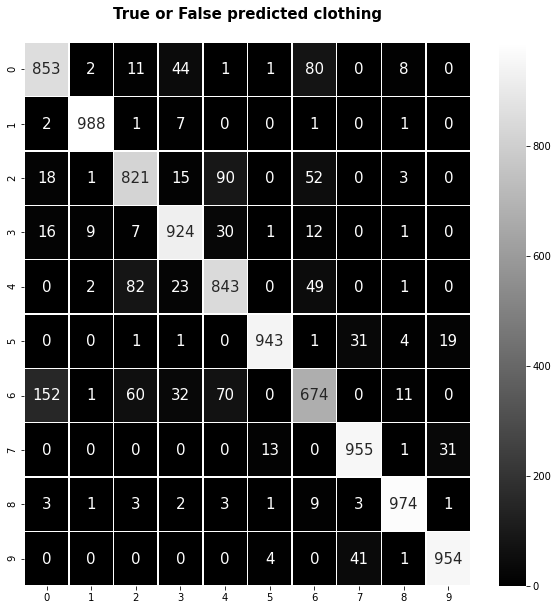

In [40]:
con_mat=confusion_matrix(y_test,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted clothing\n',fontweight='bold',fontsize=15)
plt.show()

# Using CNN

In [41]:
x_train = X_train.values.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [42]:
x_test = x_test.values.reshape(10000, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [43]:
y_train.values.reshape(60000, 1)
y_train.shape

(60000,)

In [44]:
y_test.values.reshape(10000, 1)
y_test.shape

(10000,)

In [45]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
# model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
# model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
# model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256))
# model.add(tf.keras.layers.Activation('elu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Activation('softmax'))

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

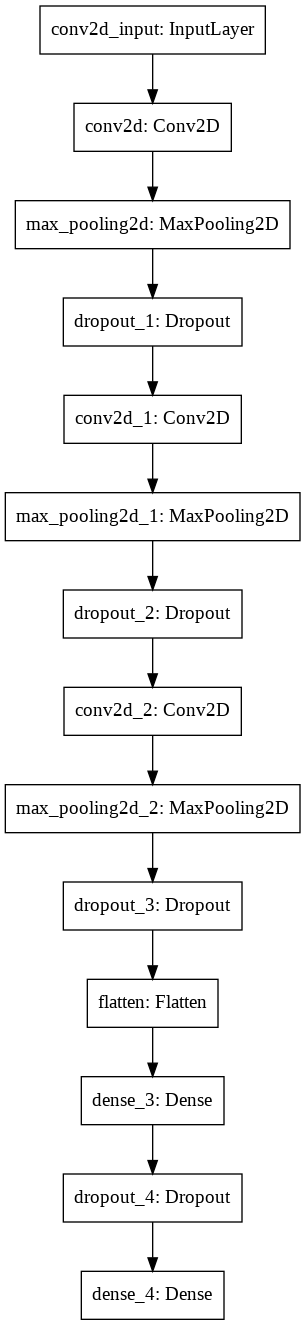

In [47]:
tf.keras.utils.plot_model(model)

In [48]:
# model.compile(
#       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
#       loss='sparse_categorical_crossentropy',
#       metrics=['sparse_categorical_accuracy'])

model_history = model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    epochs=40
)
model_history.params

Epoch 1/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4999 - sparse_categorical_accuracy: 0.8170
Epoch 2/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3241 - sparse_categorical_accuracy: 0.8814
Epoch 3/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2904 - sparse_categorical_accuracy: 0.8926
Epoch 4/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2699 - sparse_categorical_accuracy: 0.9016
Epoch 5/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2529 - sparse_categorical_accuracy: 0.9065
Epoch 6/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2426 - sparse_categorical_accuracy: 0.9107
Epoch 7/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2369 - sparse_categorical_accuracy: 0.9119
Epoch 8/40
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9161
Epoch 9/40
1875/

{'epochs': 40, 'steps': 1875, 'verbose': 1}

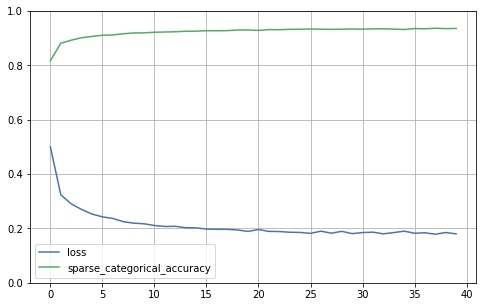

In [49]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Testing

In [50]:
cnn_test_loss, cnn_test_accuracy = model.evaluate(x_test, y_test)
print("\n Accuracy of CNN model:",cnn_test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.2303 - sparse_categorical_accuracy: 0.9223

 Accuracy of CNN model: 0.9222999811172485


In [51]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)

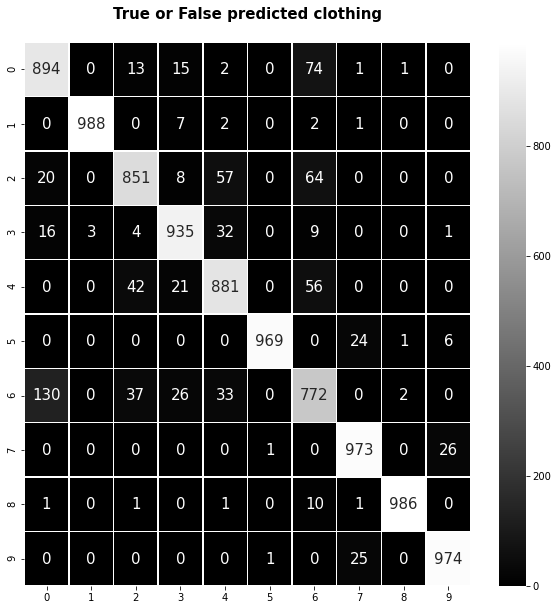

In [52]:
con_mat=confusion_matrix(y_test,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted clothing\n',fontweight='bold',fontsize=15)
plt.show()

# Accuracy comparison

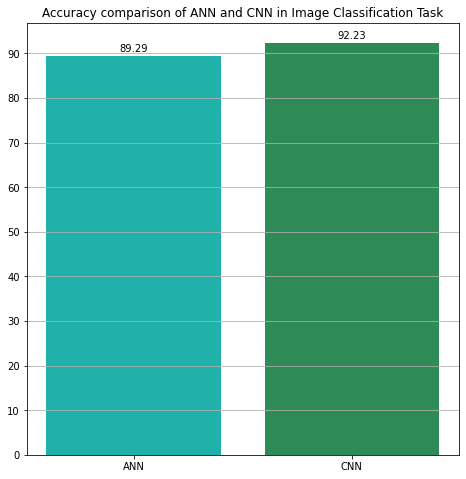

<Figure size 432x288 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([1.2, 1.2, 1.2, 1.2])
accuracies = [89.28999900817871, 92.22999811172485]
models = ['ANN', 'CNN']
ax.bar(models, accuracies, color=['lightseagreen', 'seagreen'])
for i in ax.patches:
   height = i.get_height()
   ax.annotate('{}'.format(round(height, 4)),
               xy=(i.get_x() + i.get_width() / 2, height),
               xytext=(0, 3),  # 3 points vertical offset
               textcoords="offset points",
               ha='center', va='bottom')
ax.yaxis.grid()
plt.yticks(range(0, 100, 10))
plt.title("Accuracy comparison of ANN and CNN in Image Classification Task")
plt.savefig('/content/gdrive/My Drive/Kaggle/accuracy_comparison_img_classification_ann_v_cnn.png')
plt.show()
plt.draw()